### Tutorial for processing low-mag images

In [1]:
from ptolemy.Ptolemy import Ptolemy
from ptolemy.mrc import load_mrc
from ptolemy.visualization import viz_lm_image

In [2]:
ptolemy = Ptolemy()

In [3]:
ex = load_mrc('example_images/low_mag/20may08a_16760340.mrc')

In [4]:
outputs = ptolemy.process_lm_image(ex)

In [5]:
raw_crops, centers, vertices, areas, mean_intensities, features, prior_scores = outputs

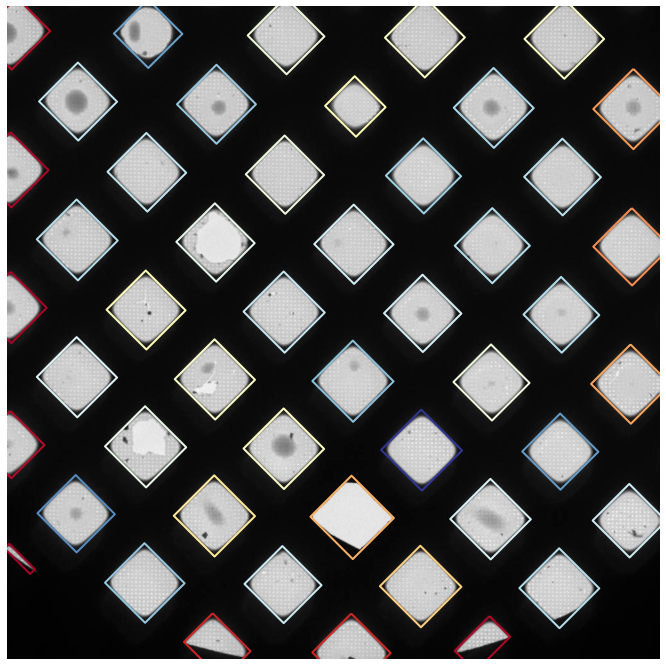

In [6]:
viz_lm_image(ex, vertices, prior_scores)